# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
city_names = []
countries = []
cloudiness = []
dates = []
humidity = []
latitudes = []
longitudes = []
max_temps = []
wind_speeds = []

In [8]:
i = 1
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&"
for city in cities:
    city=city
    query_url = url + "appid=" + weather_api_key + "&q=" + city
    response = requests.get(query_url).json()
    
#Extracting data. Missing data is handled by try and except  
    try:
        
        city_names.append(response["name"])
        countries.append(response["sys"]["country"])
        cloudiness.append(response["clouds"]["all"])
        dates.append(response["dt"])
        humidity.append(response["main"]['humidity'])
        latitudes.append(response["coord"]["lat"])  
        longitudes.append(response["coord"]["lon"])
        max_temps.append(response["main"]['temp_max'])
        wind_speeds.append(response["wind"]["speed"])
       
        print(f"Processing record {i}|{city}")
        i+=1
    except (KeyError):
        print("City not found. skipping.")


Processing record 1|komsomolskiy
Processing record 2|jamestown
City not found. skipping.
Processing record 3|puerto ayora
Processing record 4|mataura
Processing record 5|comodoro rivadavia
City not found. skipping.
Processing record 6|rikitea
Processing record 7|port elizabeth
Processing record 8|trairi
Processing record 9|kapaa
Processing record 10|ankpa
Processing record 11|santa rosa
Processing record 12|bichura
Processing record 13|new norfolk
Processing record 14|herat
Processing record 15|harper
Processing record 16|lebu
Processing record 17|shimoda
Processing record 18|albany
Processing record 19|tuktoyaktuk
City not found. skipping.
Processing record 20|walvis bay
Processing record 21|punta arenas
Processing record 22|busselton
Processing record 23|amberley
Processing record 24|norman wells
Processing record 25|hermanus
Processing record 26|yellowknife
Processing record 27|hobart
Processing record 28|bluff
Processing record 29|roma
Processing record 30|kodiak
Processing record 

Processing record 247|takoradi
Processing record 248|samarai
Processing record 249|hanstholm
Processing record 250|chimbote
City not found. skipping.
Processing record 251|darhan
Processing record 252|talnakh
Processing record 253|wajima
Processing record 254|sambava
Processing record 255|cidreira
City not found. skipping.
Processing record 256|takab
Processing record 257|snyder
Processing record 258|surt
Processing record 259|halifax
Processing record 260|bendigo
Processing record 261|kharan
Processing record 262|novikovo
Processing record 263|kungurtug
Processing record 264|santa isabel do rio negro
Processing record 265|kasane
Processing record 266|morki
City not found. skipping.
Processing record 267|college
Processing record 268|yaan
Processing record 269|george
Processing record 270|san juan
Processing record 271|lagoa
Processing record 272|jibuti
Processing record 273|clyde river
Processing record 274|shobara
Processing record 275|port augusta
Processing record 276|luau
Processi

Processing record 502|yatou
Processing record 503|hachinohe
Processing record 504|saint-joseph
Processing record 505|san pedro
Processing record 506|santa cruz
Processing record 507|little current
Processing record 508|barabai
Processing record 509|cartagena
Processing record 510|fort nelson
Processing record 511|fairview
Processing record 512|nishihara
City not found. skipping.
Processing record 513|talcahuano
Processing record 514|karancskeszi
City not found. skipping.
Processing record 515|brebes
Processing record 516|yambio
Processing record 517|san carlos de bariloche
Processing record 518|klyuchi
Processing record 519|lindenwold
Processing record 520|kandi
Processing record 521|vanimo
Processing record 522|sitka
Processing record 523|qaqortoq
Processing record 524|yaroslavskiy
Processing record 525|pitimbu
Processing record 526|henties bay
City not found. skipping.
Processing record 527|shahdadkot
Processing record 528|duxbury
Processing record 529|tautira
Processing record 530|h

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
weather_cities = pd.DataFrame({ 
                "City" : city_names,
                "Country" : countries,
                "Cloudiness" : cloudiness,
                "Date" : dates,
                "Humidity" : humidity,
                "Lat" : latitudes,
                "Lng" : longitudes,
                "Max Temp" : max_temps,
                "Wind Speed" : wind_speeds
})
weather_cities.to_csv("../output_data/weather_cities.csv")

#Displaying dataframe
weather_cities.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Yangi Marg`ilon,UZ,49,1613014227,87,40.4272,71.7189,41.00,3.74
1,Jamestown,US,90,1613014173,86,42.0970,-79.2353,18.00,5.75
2,Puerto Ayora,EC,82,1613014228,99,-0.7393,-90.3518,75.00,1.01
3,Mataura,NZ,100,1613014228,88,-46.1927,168.8643,49.89,11.88
4,Comodoro Rivadavia,AR,0,1613014226,94,-45.8667,-67.5000,62.60,24.63


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
humidity_max = weather_cities.loc[weather_cities['Humidity'].idxmax()]
humidity_max


City          Port Elizabeth
Country                   ZA
Cloudiness                90
Date              1613014034
Humidity                 100
Lat                  -33.918
Lng                  25.5701
Max Temp                71.6
Wind Speed              3.44
Name: 6, dtype: object

In [ ]:
# based on above, no cities with higher than 100 humidity


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

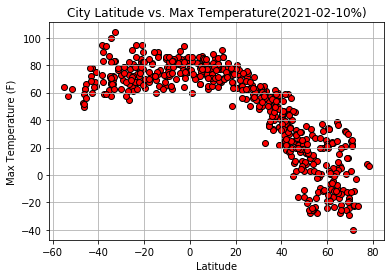

In [22]:
#Timestamp for title of plot
timefortitle = weather_cities["Date"][0]
timestamp = time.time()
date_timestamp = time.strftime('%Y-%m-%d%', time.localtime(timestamp))


#Scatter plot
plt.scatter(weather_cities["Lat"], weather_cities["Max Temp"], marker = "o", color = "red",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperature({date_timestamp})")
plt.savefig("../output_data/latitude_vs_temperature_plot")
plt.show()

## Latitude vs. Humidity Plot

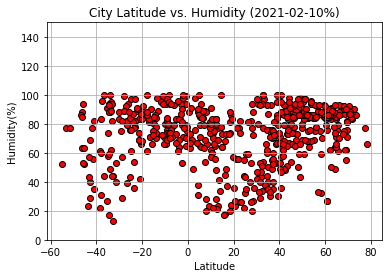

In [24]:
plt.scatter(weather_cities["Lat"], weather_cities["Humidity"], marker = "o", color = "red",edgecolor = "black")
plt.grid()
plt.ylim(0, weather_cities["Humidity"].max()+50)
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ({date_timestamp})")
plt.savefig("../output_data/latitude_vs_humidity_plot")
plt.show()

## Latitude vs. Cloudiness Plot

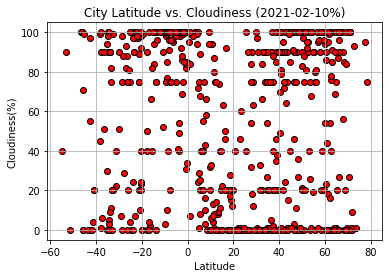

In [26]:
plt.scatter(weather_cities["Lat"], weather_cities["Cloudiness"], marker = "o", color = "red",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ({date_timestamp})")
plt.savefig("../output_data/latitude_vs_cloudiness_plot")
plt.show()

## Latitude vs. Wind Speed Plot

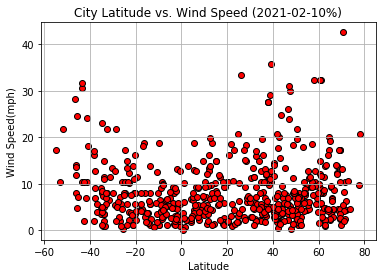

In [27]:
plt.scatter(weather_cities["Lat"], weather_cities["Wind Speed"], marker = "o", color = "red",edgecolor = "black")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(mph)")
plt.title(f"City Latitude vs. Wind Speed ({date_timestamp})")
plt.savefig("../output_data/latitude_vs_windspeed_plot")
plt.show()

## Linear Regression

In [32]:
def linear_regression_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [30]:
Northern_hemisphere = weather_cities.loc[weather_cities["Lat"]>0]
Southern_hemisphere = weather_cities.loc[weather_cities["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8829685271157898


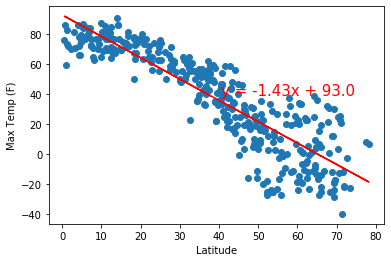

None


In [33]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_regression_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.3846535995716133


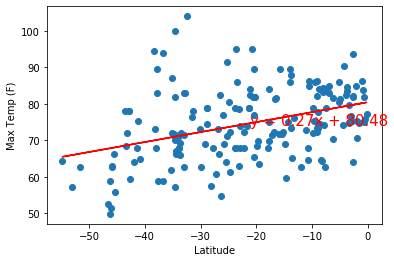

None


In [34]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
print(linear_regression_plot(x_values,y_values))


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3131788301581336


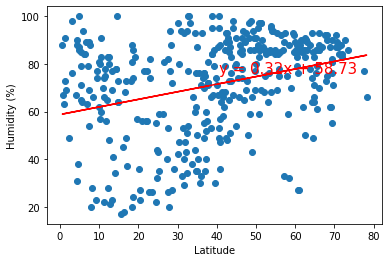

None


In [35]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_regression_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.32649119180568387


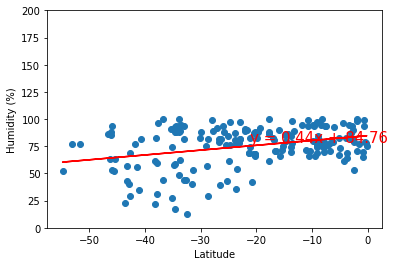

None


In [36]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylim(0, y_values.max()+100)
plt.ylabel("Humidity (%)")
print(linear_regression_plot(x_values,y_values))

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14612420876655158


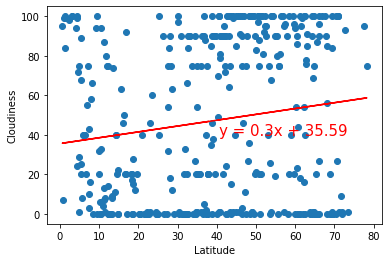

None


In [37]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_regression_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.32121195594360535


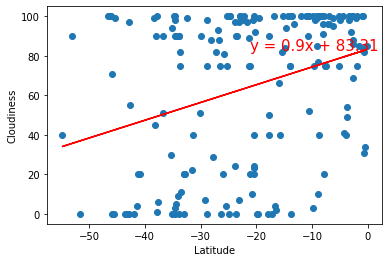

None


In [38]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_regression_plot(x_values,y_values))

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09924046574751239


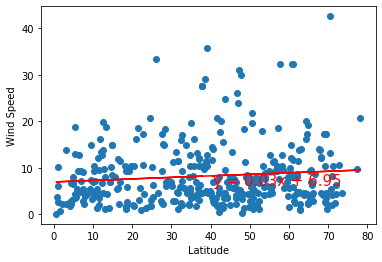

None


In [39]:
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_regression_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.42209065740046103


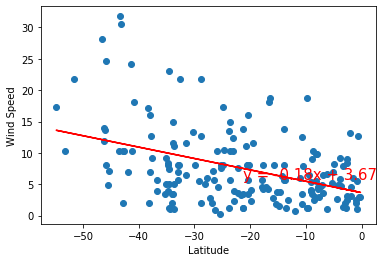

None


In [40]:
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_regression_plot(x_values,y_values))